In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os 
import sys
import datetime as DT

os.chdir(r'C:\Users\Asus\Documents\Holmusk data\datasciencepositionatholmusk')
bill_amount = pd.read_csv('bill_amount.csv')
bill_id = pd.read_csv('bill_id.csv')
clinical_data = pd.read_csv('clinical_data.csv')
demo = pd.read_csv('demographics.csv')

In [2]:
#convert to lowercase for ease of application
demo.gender = demo.gender.apply(lambda x: x.lower())

In [3]:
demo.race = demo.race.apply(lambda x: x.lower())

In [4]:
demo.resident_status = demo.resident_status.apply(lambda x: x.lower())

In [5]:
demo.gender.value_counts()

female    1396
male      1333
m          170
f          101
Name: gender, dtype: int64

In [6]:
demo.race.value_counts()

chinese    1915
malay       629
indian      195
others      161
india       100
Name: race, dtype: int64

In [7]:
demo.resident_status.value_counts()

singaporean          1782
singapore citizen     610
pr                    465
foreigner             143
Name: resident_status, dtype: int64

In [8]:
demo.gender = demo.gender.apply(lambda x: 'male' if x == 'm' else('female' if x == 'f' else (x)))

In [9]:
demo.race = demo.race.apply(lambda x: 'indian' if x == 'india' else(x))

In [10]:
demo.resident_status = demo.resident_status.apply(lambda x: 'singaporean' if x == 'singapore citizen' else(x))

In [11]:
demo.date_of_birth = demo.date_of_birth.astype('datetime64')

In [12]:
now = pd.to_datetime('today').year
demo['age'] = now - demo.date_of_birth.dt.year

In [13]:
demo = demo.drop('date_of_birth', axis =1)

In [14]:
demo = demo.set_index('patient_id')

In [15]:
clinical_data = clinical_data.sort_values(['id', 'date_of_admission'])

In [16]:
cd_dup = clinical_data[[not i for i in clinical_data.duplicated(subset = ['id'])]]

In [17]:
cd_dup = cd_dup.fillna(value = 0)

In [18]:
cd_dup.medical_history_3 = cd_dup.medical_history_3.apply(lambda x: x if type(x) == int else (1 if x == 'Yes' else (0)))

In [19]:
cd_dup.medical_history_2 = cd_dup.medical_history_2.astype('int64')
cd_dup.medical_history_5 = cd_dup.medical_history_5.astype('int64')

In [20]:
cd_dup.date_of_admission = cd_dup.date_of_admission.astype('datetime64')
cd_dup.date_of_discharge = cd_dup.date_of_discharge.astype('datetime64')

In [21]:
cd_dup['inpatient_D'] = (cd_dup.date_of_discharge - cd_dup.date_of_admission).dt.days

In [22]:
cd_dup['BMI'] = (cd_dup.weight/(cd_dup.height*cd_dup.height) * 10000)

In [23]:
cd_dup = cd_dup.drop(['date_of_discharge', 'weight', 'height'], axis =1)

In [24]:
cd_dup = cd_dup.set_index('id')

In [25]:
joined = cd_dup.merge(demo, left_index = True, right_index = True)

In [26]:
bill_id['patient_id'] = bill_id.patient_id.astype(str)
bill_id.set_index('patient_id').sort_index()

,bill_id,date_of_admission
patient_id,,
00225710a878eff524a1d13be817e8e2,8461069832,2014-04-10
00225710a878eff524a1d13be817e8e2,7746811189,2014-04-10
00225710a878eff524a1d13be817e8e2,4692776325,2014-04-10
00225710a878eff524a1d13be817e8e2,5175703971,2014-04-10
0029d90eb654699c18001c17efb0f129,3604841170,2012-11-07
0029d90eb654699c18001c17efb0f129,5621737529,2012-11-07
0029d90eb654699c18001c17efb0f129,5041212157,2012-11-07
0029d90eb654699c18001c17efb0f129,645202091,2012-11-07
0040333abd68527ecb53e1db9073f52e,167943546,2013-01-19


In [27]:
bill = pd.merge(bill_id, bill_amount, on = 'bill_id')

In [28]:
bill = bill.set_index('patient_id', 'date_of_admission').sort_index()

In [29]:
bill = bill.drop('bill_id', axis =1 )

In [30]:
bg = bill.groupby(['patient_id', 'date_of_admission']).amount.sum()

In [31]:
bg_ri = bg.reset_index()

In [32]:
bg_first = bg_ri[[not i for i in bg_ri.duplicated(subset = 'patient_id')]]

In [33]:
bg_first = bg_first.set_index('patient_id')

In [34]:
merged = joined.merge(bg_first, left_index = True, right_index = True)

In [35]:
merged = merged.drop(['date_of_admission_x', 'date_of_admission_y'], axis = 1)

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


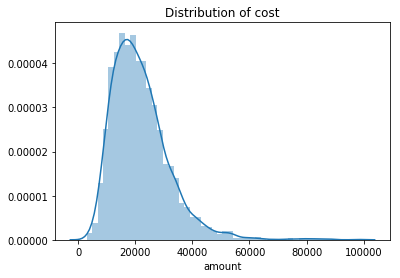

In [36]:
distPlot = sns.distplot(merged['amount'])
plt.title("Distribution of cost")
plt.show()

In [37]:
merged.amount.describe()
#NOTE: Handle outlier cases & assess for need to do log transformation

count     3000.000000
mean     21798.335703
std      10161.000119
min       2946.100354
25%      14665.890997
50%      20101.522184
75%      26733.192619
max      98120.870207
Name: amount, dtype: float64

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


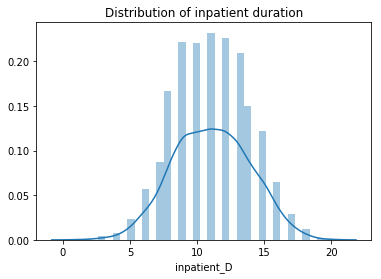

In [38]:
distPlot_inD = sns.distplot(merged['inpatient_D'])
plt.title("Distribution of inpatient duration")
plt.show()

In [48]:
merged.inpatient_D.describe()

count    3000.000000
mean       11.078667
std         2.855497
min         1.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        20.000000
Name: inpatient_D, dtype: float64

C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


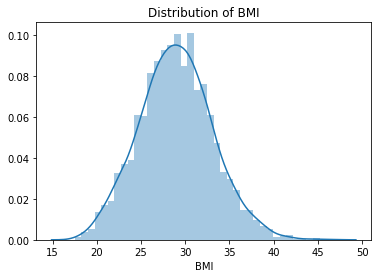

In [39]:
distPlot_bmi = sns.distplot(merged['BMI'])
plt.title("Distribution of BMI")
plt.show()

In [40]:
merged.BMI.describe()

count    3000.000000
mean       28.955222
std         4.144775
min        17.508651
25%        26.161927
50%        28.921908
75%        31.675212
max        46.677349
Name: BMI, dtype: float64

TypeError: 'AxesSubplot' object does not support indexing

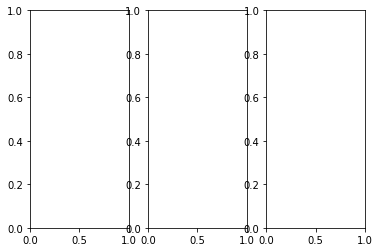

In [43]:
fig, ax = plt.subplots(ncols = 3, nrows =1)
ax[0][0].set_title('Lab Test 1', y = 1.2)
ax[0][1].set_title('Lab Test 1', y = 1.2)
ax[0][2].set_title('Lab Test 1', y = 1.2)

sns.distplot(merged['lab_test_1'], ax = ax[0][0])
sns.distplot(merged['lab_test_2'], ax = ax[0][1])
sns.distplot(merged['lab_test_3'], ax = ax[0][2])

plt.show()